# Comparación de Métodos Estocásticos de estimación de IBNR

## Carga de datos

In [32]:
# Cargar librerías
import IBNR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Triángulo  - Tabla 1: Mack (1993) https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=c449e39e64fd29b9aac7dd9266b841aa7ebc17ac

tab1 = [
[357848, 1124788, 1735330, 2218270, 2745596, 3319994, 3466336, 3606286, 3833515, 3901463],
[352118, 1236139, 2170033, 3353322, 3799067, 4120063, 4647867, 4914039, 5339085, 0],
[290507, 1292306, 2218525, 3235179, 3985995, 4132918, 4628910, 4909315, 0, 0],
[310608, 1418858, 2195047, 3757447, 4029929, 4381982, 4588268, 0, 0, 0],
[443160, 1136350, 2128333, 2897821, 3402672, 3873311, 0, 0, 0, 0],
[396132, 1333217, 2180715, 2985752, 3691712, 0, 0, 0, 0, 0],
[440832, 1288463, 2419861, 3483130, 0, 0, 0, 0, 0, 0],
[359480, 1421128, 2864498, 0, 0, 0, 0, 0, 0, 0],
[376686, 1363294, 0, 0, 0, 0, 0, 0, 0, 0],
[344014, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]


In [8]:
# Crear objeto
tr_acumulado = IBNR.Triangulo(triangulo = np.array(tab1),
                              años_desarrollo=range(1,11),
                              años_siniestro=range(1,11),tipo='Conteos')

tr = tr_acumulado.desacumular() # Desacumular triángulo original
tr

Año Desarrollo      1        2        3        4       5       6       7   \
Año Siniestro                                                               
1               357848   766940   610542   482940  527326  574398  146342   
2               352118   884021   933894  1183289  445745  320996  527804   
3               290507  1001799   926219  1016654  750816  146923  495992   
4               310608  1108250   776189  1562400  272482  352053  206286   
5               443160   693190   991983   769488  504851  470639       0   
6               396132   937085   847498   805037  705960       0       0   
7               440832   847631  1131398  1063269       0       0       0   
8               359480  1061648  1443370        0       0       0       0   
9               376686   986608        0        0       0       0       0   
10              344014        0        0        0       0       0       0   

Año Desarrollo      8       9      10  
Año Siniestro                      

In [24]:
# Aplicar funciones a los valores del triángulo
tr.apply(np.log)

c:\Users\SHSANCHE\OneDrive - Proteccion S.A\Procesos Actuaría\Practicante\2023-01\Proyecto IBNR\IBNR\s02_crear_triangulos.py:152: RuntimeWarning: divide by zero encountered in log


Año Desarrollo         1          2          3          4          5   \
Año Siniestro                                                           
1               12.787864  13.550164  13.322102  13.087648  13.175574   
2               12.771722  13.692236  13.747118  13.983808  13.007502   
3               12.579383  13.817308  13.738866  13.832027  13.528916   
4               12.646287  13.918293  13.562151  14.261734  12.515328   
5               13.001686  13.449059  13.807461  13.553481  13.132019   
6               12.889503  13.750529  13.650044  13.598644  13.467314   
7               12.996419  13.650201  13.938965  13.876859   0.000000   
8               12.792414  13.875333  14.182491   0.000000   0.000000   
9               12.839167  13.802028   0.000000   0.000000   0.000000   
10              12.748438   0.000000   0.000000   0.000000   0.000000   

Año Desarrollo         6          7          8          9          10  
Año Siniestro                                      

In [25]:
# Exportar a Excel
tr.to_excel('triangulo_acumulado_mack_1993.xlsx')

## Gráficos descriptivos

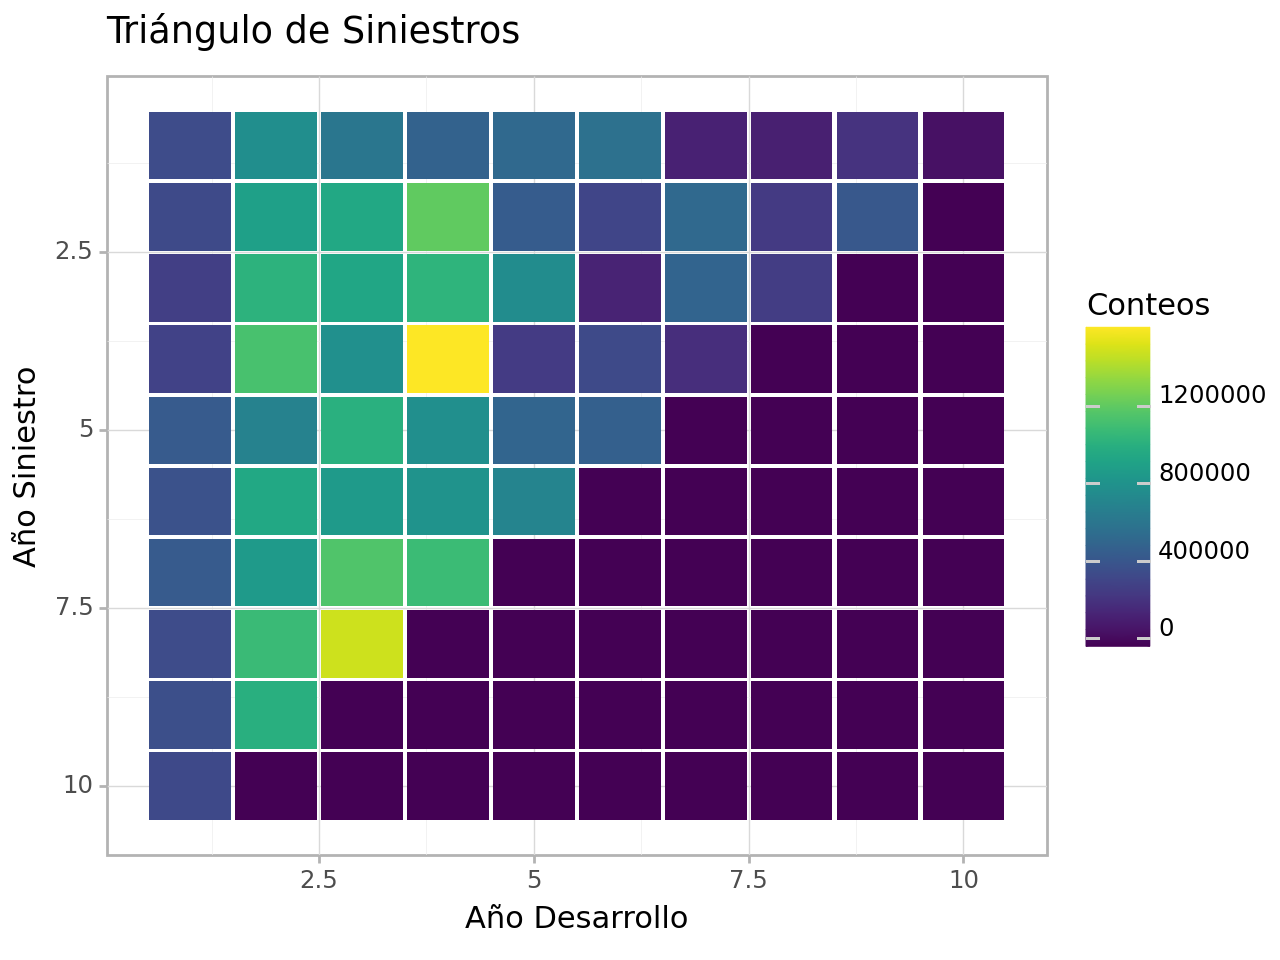

<Figure Size: (640 x 480)>

In [9]:
# Triángulo representado por medio de un mapa de calor
tr.heat_plot()

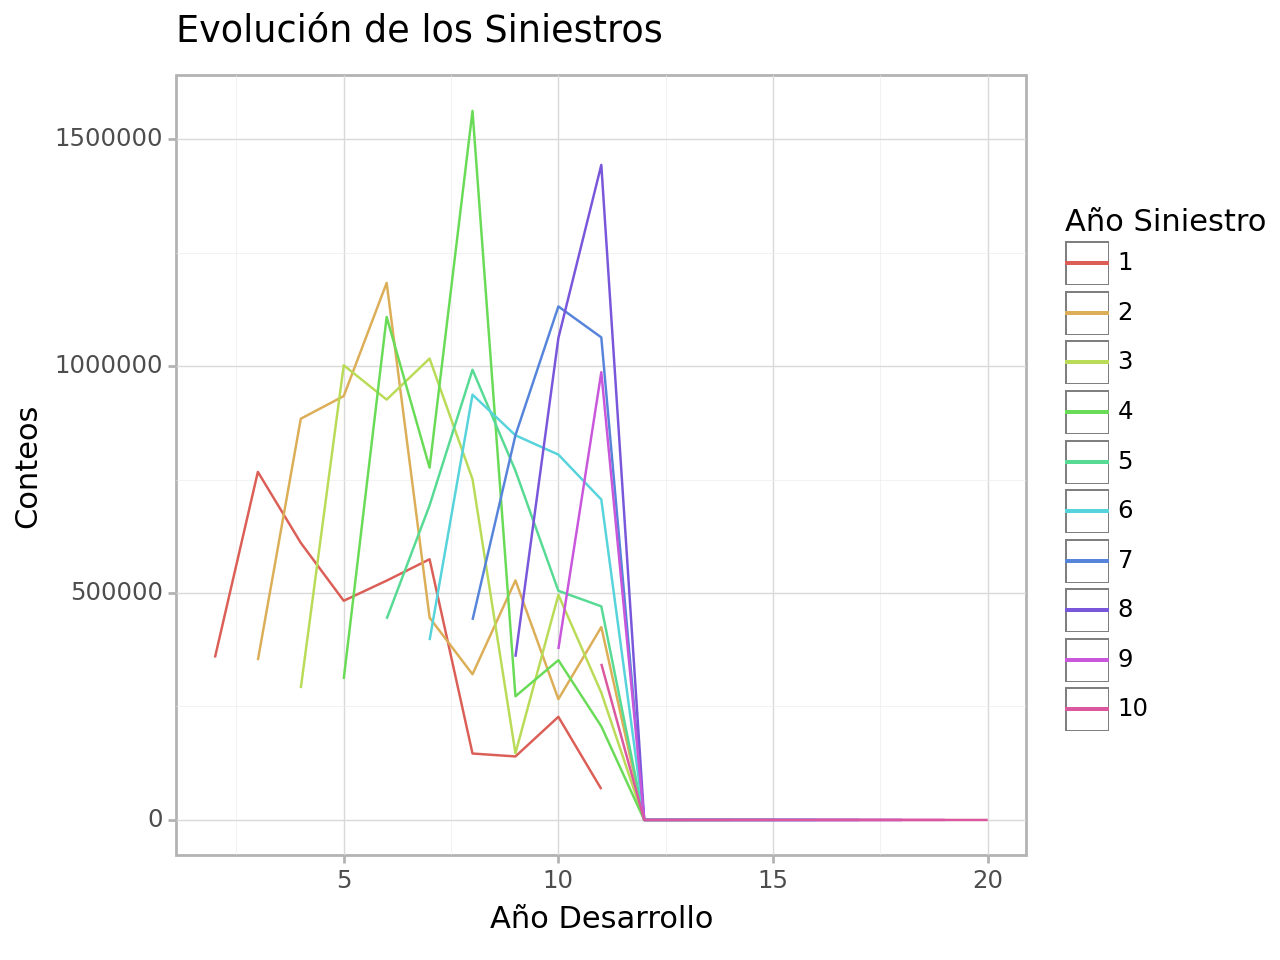

<Figure Size: (640 x 480)>

In [10]:
# Cantidad de siniestros reportados por año según el año de origen
tr.line_plot()

## Chain-Ladder

In [12]:
# Factores de desarrollo
tr.factores_desarrollo()

[3.4906065479322863,
 1.7473326421004893,
 1.4574128360182361,
 1.1738517093997867,
 1.103823532244344,
 1.0862693644363943,
 1.0538743555048127,
 1.0765551783529383,
 1.017724725219544]

In [13]:
# Varianzas
tr.varianzas()

[160280.32748048689,
 37736.855047996374,
 41965.21301742404,
 15182.902680976436,
 13731.323891978891,
 8185.771620009633,
 446.616550105352,
 1147.3659684286617,
 446.616550105352]

In [14]:
# Llenar triángulo con estimaciones
tr.fill()

Año Desarrollo      1        2        3        4       5       6       7   \
Año Siniestro                                                               
1               357848   766940   610542   482940  527326  574398  146342   
2               352118   884021   933894  1183289  445745  320996  527804   
3               290507  1001799   926219  1016654  750816  146923  495992   
4               310608  1108250   776189  1562400  272482  352053  206286   
5               443160   693190   991983   769488  504851  470639  334148   
6               396132   937085   847498   805037  705960  383286  351547   
7               440832   847631  1131398  1063269  605548  424500  389348   
8               359480  1061648  1443370  1310258  725788  508791  466659   
9               376686   986608  1018834  1089615  603568  423113  388076   
10              344014   856803   897409   959755  531635  372686  341825   

Año Desarrollo      8       9       10  
Año Siniestro                     

In [15]:
# Calcular estimación del total por año de desarrollo
tr.totales_año_siniestro()


Año Siniestro
1     3901463
2     5433718
3     5378825
4     5297904
5     4858198
6     5111169
7     5660767
8     6784795
9     5642262
10    4969817
Name: Conteos, dtype: int32

## Métodos Estocásticos

### Mack

In [19]:
est_mack = tr.limite_superior_totales()
est_mack

,Estimación Puntual,Error Estándar,Límite Superior
Año Siniestro,,,
1,3901463,0,3.901463e+06
2,5433718,61420,5.534745e+06
3,5378825,108108,5.556647e+06
4,5297904,120710,5.496454e+06
5,4858198,252158,5.272961e+06
6,5111169,401095,5.770912e+06
7,5660767,546627,6.559888e+06
8,6784795,859056,8.197816e+06
9,5642262,958811,7.219366e+06


### Bootstrap

#### Paramétrico

In [20]:
# Residuales con distribución Normal
est_bt_par_norm = tr.bootstrap(parametrico=True,distribucion_parametrica='Normal')
est_bt_par_norm

[==================================================] 5000/5000


,Estimación Puntual,Error Estándar,Límite Superior
Año Siniestro,,,
1,3901463,1.184302e+06,7272655.20
2,5433718,1.194506e+06,7166172.85
3,5378825,1.057670e+06,6049189.10
4,5297904,1.095818e+06,6401729.95
5,4858198,1.327274e+06,8733218.40
6,5111169,1.230802e+06,7881980.60
7,5660767,1.234783e+06,8509389.20
8,6784795,1.053399e+06,6997681.90
9,5642262,9.765954e+05,7106063.70


In [21]:
# Residuales con distribución t de Student
est_bt_par_t = tr.bootstrap(parametrico=True)
est_bt_par_t

[==================================================] 5000/5000


,Estimación Puntual,Error Estándar,Límite Superior
Año Siniestro,,,
1,3901463,1.225259e+06,7292054.55
2,5433718,1.195704e+06,7134433.85
3,5378825,1.080441e+06,6110840.05
4,5297904,1.134521e+06,6473687.75
5,4858198,1.349438e+06,8704490.00
6,5111169,1.248722e+06,7930195.05
7,5660767,1.306648e+06,8601035.45
8,6784795,1.075973e+06,7049736.35
9,5642262,1.014142e+06,7204075.65


#### No paramétrico

In [22]:
# Función de distribución empírica
est_bt_npar = tr.bootstrap(suavizado=False)
est_bt_npar

[==================================================] 5000/5000


,Estimación Puntual,Error Estándar,Límite Superior
Año Siniestro,,,
1,3901463,1.194784e+06,7337137.20
2,5433718,1.167222e+06,7094851.55
3,5378825,1.046163e+06,6040221.35
4,5297904,1.085885e+06,6404389.35
5,4858198,1.303841e+06,8718231.95
6,5111169,1.205641e+06,7877555.95
7,5660767,1.226971e+06,8498999.25
8,6784795,1.037986e+06,7044096.35
9,5642262,9.747336e+05,7177121.70


In [23]:
# Función de distribución empírica suavizada
est_bt_npar_suav = tr.bootstrap()
est_bt_npar_suav

[==================================================] 5000/5000


,Estimación Puntual,Error Estándar,Límite Superior
Año Siniestro,,,
1,3901463,1.369848e+06,7643879.20
2,5433718,1.317400e+06,7397655.10
3,5378825,1.208257e+06,6336944.45
4,5297904,1.237703e+06,6620871.75
5,4858198,1.491447e+06,9027322.25
6,5111169,1.357090e+06,8162928.95
7,5660767,1.414467e+06,8804822.10
8,6784795,1.185200e+06,7296835.30
9,5642262,1.128810e+06,7436971.40


### Comparación de resultados

In [36]:
df_limites = pd.DataFrame({
    'Mack' : est_mack['Límite Superior'],
    'BT P N' : est_bt_par_norm['Límite Superior'],
    'BT P T' : est_bt_par_t['Límite Superior'],
    'BT NP' : est_bt_npar['Límite Superior'],
    'BT NP S' : est_bt_npar_suav['Límite Superior']
},index = est_mack.index).drop('Total')
df_limites

,Mack,BT P N,BT P T,BT NP,BT NP S
Año Siniestro,,,,,
1,3.901463e+06,7272655.20,7292054.55,7337137.20,7643879.20
2,5.534745e+06,7166172.85,7134433.85,7094851.55,7397655.10
3,5.556647e+06,6049189.10,6110840.05,6040221.35,6336944.45
4,5.496454e+06,6401729.95,6473687.75,6404389.35,6620871.75
5,5.272961e+06,8733218.40,8704490.00,8718231.95,9027322.25
6,5.770912e+06,7881980.60,7930195.05,7877555.95,8162928.95
7,6.559888e+06,8509389.20,8601035.45,8498999.25,8804822.10
8,8.197816e+06,6997681.90,7049736.35,7044096.35,7296835.30
9,7.219366e+06,7106063.70,7204075.65,7177121.70,7436971.40


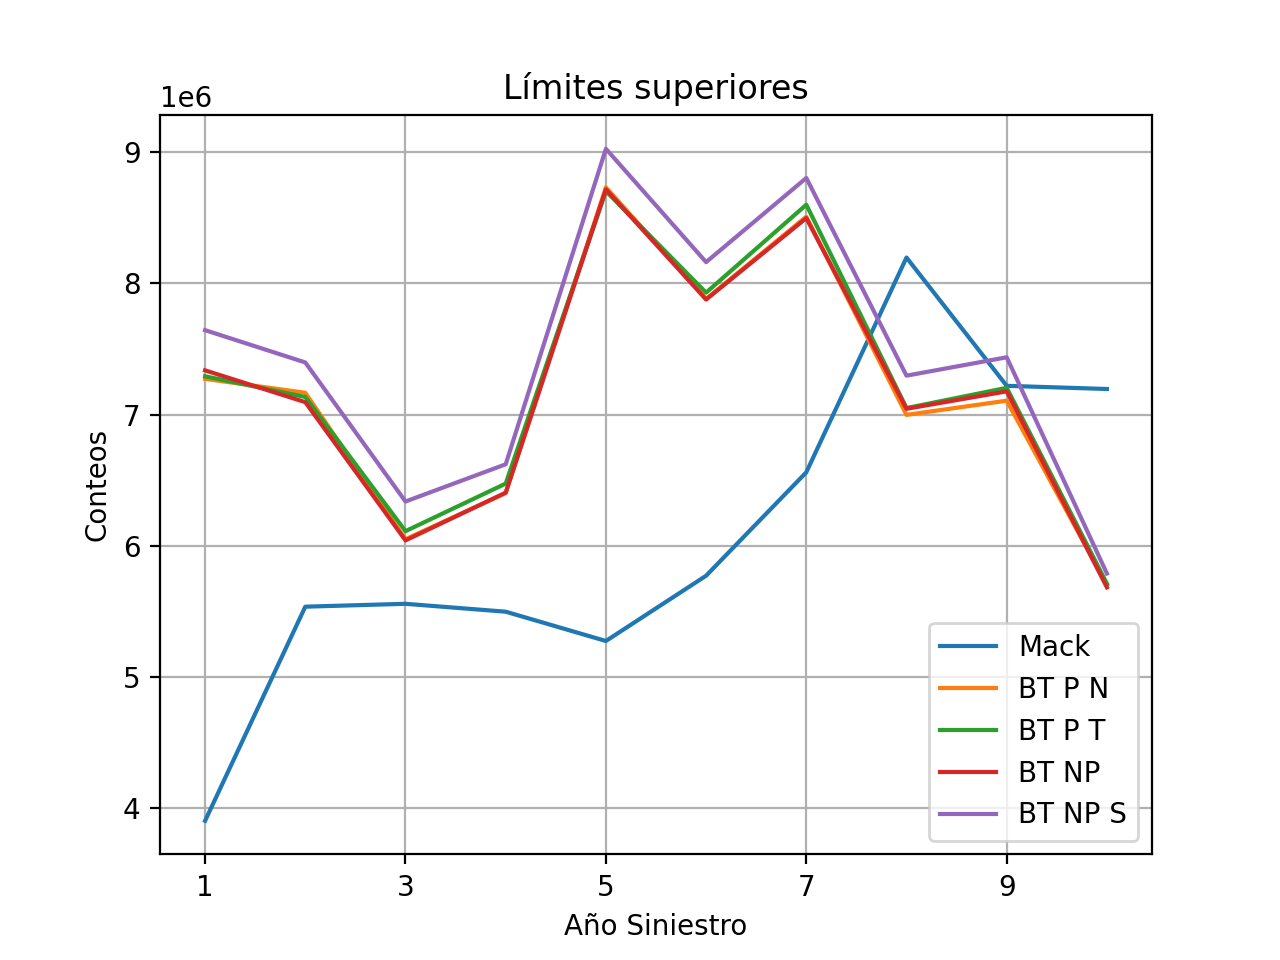

In [41]:
df_limites.plot(y = df_limites.columns,kind = 'line',
                title = 'Límites superiores',ylabel = tr.tipo)
plt.grid()
plt.show()